In [7]:
import os

import cv2
import numpy as np
from scipy.ndimage.filters import gaussian_filter

import pylab as plt
%matplotlib inline

In [17]:
path = os.getcwd() + os.sep
#path += '../db_images/png/captcha.png'
path += '../db_images/jpeg/captcha.jpeg'

In [18]:
thresholds = []

img = cv2.imread(path)
thresholds.append(('Original', img))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresholds.append(('Gray', gray))

sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=1)
thresholds.append(('sobel x', sobel_x))

sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=1)
thresholds.append(('sobel y', sobel_y))

sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
thresholds.append(('sobel x', sobel_x))

sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
thresholds.append(('sobel y', sobel_y))

sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
thresholds.append(('sobel x', sobel_x))

sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
thresholds.append(('sobel y', sobel_y))

edges = cv2.Canny(gray, 100, 255)
thresholds.append(('edges', edges))

edges = cv2.Canny(gray, 135, 255)
thresholds.append(('edges', edges))

edges = cv2.Canny(gray, 71, 255)
thresholds.append(('edges', edges))

edges = cv2.Canny(gray, 100, 200)
thresholds.append(('edges', edges))

gaussian_blur5 = cv2.GaussianBlur(gray, (5, 5), 0.)
gaussian_blur3 = cv2.GaussianBlur(gray, (3, 3), 0.)
dog = gaussian_blur5 - gaussian_blur3
thresholds.append(('DoG', dog))

gaussian_blur7 = cv2.GaussianBlur(gray, (7, 7), 0.)
gaussian_blur5 = cv2.GaussianBlur(gray, (5, 5), 0.)
dog = gaussian_blur7 - gaussian_blur5
thresholds.append(('DoG', dog))

In [10]:
def DoG(image, k=200, gamma=1):
    s1 = 0.5
    s2 = s1*k
    gauss1 = gaussian_filter(image, s1)
    gauss2 = gamma*gaussian_filter(image, s2)
    return gauss1 - gauss2

def XDoG(image, epsilon=0.05):
    phi = 10
    difference = DoG(image, 200, 0.98)/255
    diff = difference*image

    for i in range(0, len(difference)):
        for j in range(0, len(difference[0])):
            if difference[i][j] >= epsilon:
                difference[i][j] = 1
            else:
                ht = np.tanh(phi*(difference[i][j] - epsilon))
                difference[i][j] = 1 * ht
    return difference*255

In [11]:
xdog = XDoG(gray, epsilon=0.01)
thresholds.append(('XDoG', xdog))

xdog = XDoG(gray, epsilon=0.05)
thresholds.append(('XDoG', xdog))

xdog = XDoG(gray, epsilon=0.1)
thresholds.append(('XDoG', xdog))

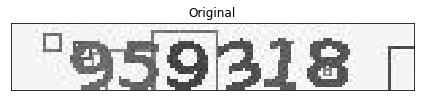

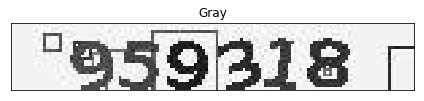

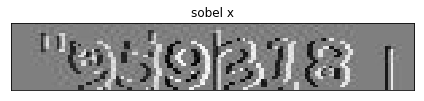

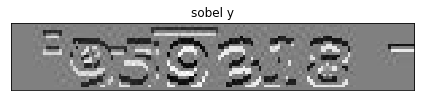

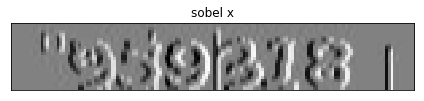

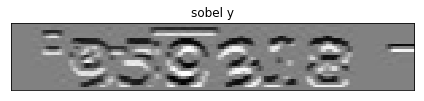

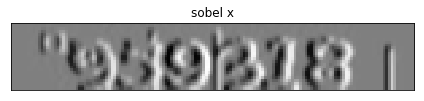

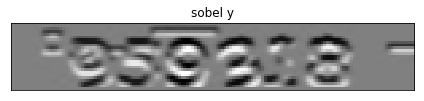

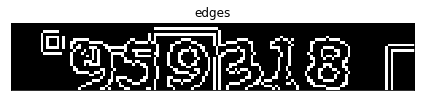

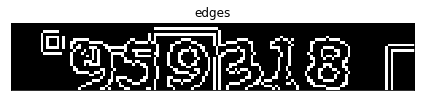

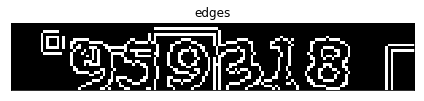

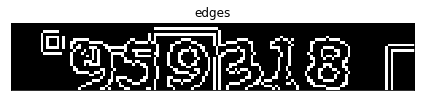

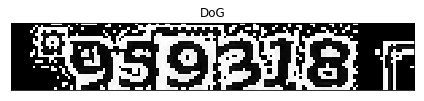

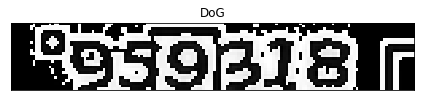

In [21]:
for title, image in thresholds:
    plt.figure()
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    if 'original'.upper() is title.upper():
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.tight_layout()